#Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

%matplotlib inline

# Exercise 1.2

Suppose that we use a perceptron to detect spam messages. Let's say that each email message is represented by the frequency of occurrence of keywords, and the output is +1 if the message is considered spam. 


*   (a) Can you think of some keywords that wil end up with a large positive weight in the perceptron?
*   (b) How about keywords that will get a negative weight?
*   (c) What parameter in the perceptron directly affects how many borderline messages end up being classified as spam? 



## Solution



*   (a) Save, promotion, shipping, free, order now
*   (b) Regards, hence, dear, nevertheless
*   (c) Recall that a perceptron, in its functional form $h(x)$, is defined as 

\begin{align*}
  h(x) = sign \left( \left( \sum_{i = 1}^{d} w_i x_i \right) + b \right)
\end{align*}

where $x_i$ are components of the input vector $x$, and $w_i$ are the weights that reflect the importance of each component in the decision i.e. its relevance in the threshold value. The former is determined by the bias term $b$. As one may infer from the above equation, the parameter that affects how many borderline messages end up being classified as spam is the bias $b$, since, in order to have a positive/negative value one must analize equations such as

\begin{align*}
  \sum_{i = 1}^{d} w_i x_i > - b
\end{align*}

# Exercise 1.3

The weight update rule in (1.3 - the following equation) 

\begin{align*}
  w(t + 1) = w(t) + y(t)x(t)
\end{align*}

has the nice interpretation that it moves in the direction of classifying $x(t)$ correctly.

*   (a) Show that 

\begin{align*}
  y(t)w(t)^{T}x(t) < 0
\end{align*}

*   (b) Show that

\begin{align*}
  y(t) w^{T}(t + 1) x(t) > y(t) w^{T}(t) x(t)
\end{align*}

*   (c) As far as classifying $x(t)$ is concerned, argue that the move from $w(t)$ to $w(t + 1)$ is a move 'in the right direction'.



## Solution



*   (a) Having in mind that a missclassification in a PLA implies that $y(t) \neq sign( w^{T}(t) x(t) )$, and that $y(t)$ is the vector of all the $h(x_i)$, it is easy to see that $y(t)w^{T}(t) x(t) < 0$ since they both have different signs.

*   (b) Using (1.3) we will have that

\begin{align*}
  y(t)w^{T}(t + 1)x(t) = y(t) (w(t) + y(t)x(t))^{T} x(t)
\end{align*}

Then, 

\begin{align*}
  y(t) (w(t) + y(t)x(t))^{T} x(t) &= y(t) (w^{T}(t) + y(t) x^{T}(t)) x(t) \\
  &= y(t) w^{T}(t) x(t) + y(t) y(t) x^{T}(t) x(t)
\end{align*}

Since $y(t) y(t) x^{T}(t) x(t) > 0$ we get

\begin{align*}
  y(t) (w(t) + y(t)x(t))^{T} x(t) &= y(t) (w^{T}(t) + y(t) x^{T}(t)) x(t) \\
  &= y(t) w^{T}(t) x(t) + y(t) y(t) x^{T}(t) x(t) \\
  &> y(t) w^{T}(t) x(t)
\end{align*}

That is

\begin{align*}
  y(t) w^{T}(t + 1) x(t) > y(t) w^{T}(t) x(t)
\end{align*}

As desired.

*   (c) The previous exercise tell us that, somehow, in each step the target gets 'more positive', since every time that $y(t)$ and $w^{T}(t) x(t)$ have different signs, $w^{T}(t) x(t)$ moves further into its region. Therefore, when moving from $w(t)$ to $w(t + 1)$ we are doing it 'in the right direction' because each steps push the value to its correct region. 



# Exercie 1.10

Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1 000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows: $c_{1}$ is the first coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let $v_1$, $v_{rand}$ and $v_{min}$ be the fraction of heads you obtain for the respective three coins. 



*   (a) What is $\mu$ for the three coins selected?
*   (b) Repeat this entire experiment a large number of times (e.g., 100 000 runs of the entire experiment) to get several instances of $v_1$, $v_{rand}$ and $v_{min}$ and plot the histograms of the distributions of $v_1$, $v_{rand}$ and $v_{min}$. Notice that which coins end up being $c_{rand}$ and $c_min$ may differ from one run to another
*   (c) Using (b), plot estimates for $\mathbb{P}[ |v - \mu| > \varepsilon]$ as a function of $ɛ$, together with the Hoeffding bound $2e^{-2 \varepsilon^2 N}$ (on the same graph).
*   (d) Which coins obey the Hoeffding bound, and which ones do not? Explain why.
*   (e) Relate part (d) to the multiple bins in Figure 1.10.

## Solution 

Throughout this exercise we will be using the following functions

In [2]:
def run_once(total_coins, total_flips, print_freq = False): # As arguments we wil admit the total number of coins and flips, and a boolean value for determing whether or not print de frequency
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins) #We pick a coin at random
    hts_sum = np.zeros(total_coins) 
    
    for flip in range(total_flips): #Here we are 'flippling' the coins the respective number of times
        hts_sum = hts_sum + flip_coins(total_coins) #Store the sum of heads in total_flips
    
    hts_freq = hts_sum/total_flips #Calculate the frequency
    
    v1 = hts_freq[0] #Here we compute the ratios and find c_min
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frequency of first coin: {}'.format(v1))
        print('Frequency of a random coin: id({})-freq({})'.format(crand, vrand))
        print('Frequency of the coin with minimum frequency: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

In [3]:
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

In [4]:
def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)



*   (a) The coins are fair, therefore $\mu = 0.5$

In [5]:
total_coins = 1000
total_flips = 10
run_once(total_coins, total_flips, True)

Frequency of first coin: 0.5
Frequency of a random coin: id(746)-freq(0.3)
Frequency of the coin with minimum frequency: id(141)-freq(0.0)


(0.5, 0.3, 0.0)

*   (b) Repeating the experiment the requested number of times we will get

(array([6.24134e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.75840e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.60000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <BarContainer object of 10 artists>)

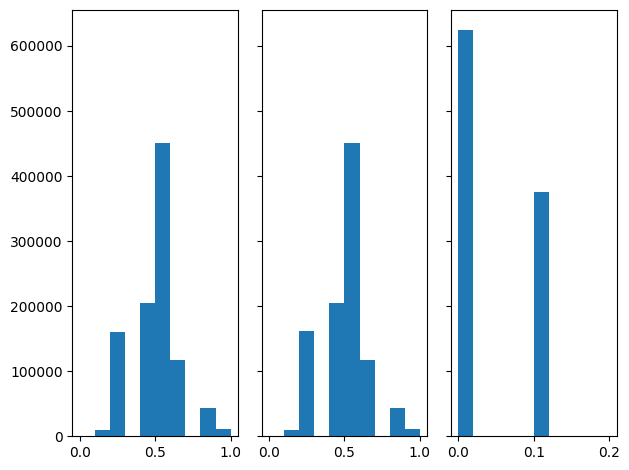

In [6]:
total_coins = 1000
total_flips = 10
total_runs = 1000000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = run_once(total_coins, total_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)

*   (c) Let's estimate both bounds

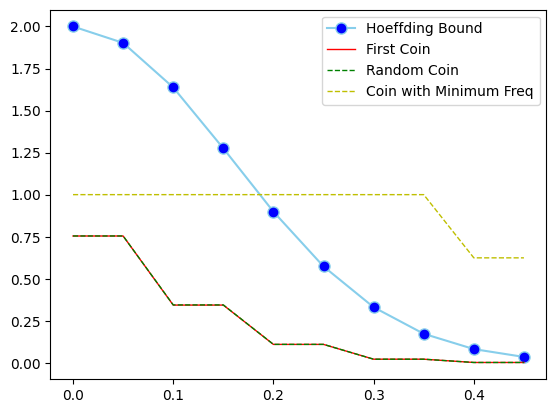

In [7]:
eps = np.arange(0.0,0.5,0.05)
bounds = hoeffding_bound(eps, total_flips)
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))

for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep)/total_runs
    prand[idx] = np.sum(vrandd > ep)/total_runs
    pmin[idx] = np.sum(vmind > ep)/total_runs

#plt.ylim((0,0.01))    
plt.plot(eps, bounds, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(eps, p1, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(eps, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.legend()

*   (d) It is clear from the graphs that the first and the random coin are the ones that obey the Hoeffding bound. Also, we can see that the coin which does not obey Hoeffding bound. Recall that the Hoeffding inequality says that the hypothesis $h$ has been fixed before samples were drawn but, since the first twon coins were chosed before the experiment while for the last coin we have to flip them all first in order to compute the coin with minimum frequency of heads. 

*   (e) As commented above, the first two coins are choosing the bins before, while finding the coin with minimum frequency is choosing the bin after the samplinf data.

# Exercise 1.11

We are given a data set $\mathcal{D}$ of 25 training examples from an unknown target function $f: \mathcal{X} \rightarrow \mathcal{Y}$, where $\mathcal{X}=\mathbb{R}$ and $\mathcal{Y}=\{-1,+1\}$. To learn $f$, we use a simple hypothesis set $\mathcal{H}=\left\{h_1, h_2\right\}$ where $h_1$ is the constant +1 function and $h_2$ is the constant -1 .

We consider two learning algorithms, S (smart) and C (crazy). S chooses the hypothesis that agrees the most with $\mathcal{D}$ and $C$ chooses the other hypothesis deliberately. Let us see how these algorithms perform out of sample from the deterministic and probabilistic points of view. Assume in the probabilistic view that there is a probability distribution on $\mathcal{X}$, and let $\mathbb{P}[f(\mathbf{x})=+1]=p$.

* (a) Can S produce a hypothesis that is guaranteed to perform better than random on any point outside $\mathcal{D}$ ?

* (b) Assume for the rest of the exercise that all the examples in $\mathcal{D}$ have $y_n=+1$. Is it possible that the hypothesis that $\mathrm{C}$ produces turns out to be better than the hypothesis that $\mathrm{S}$ produces?

* (c) If $p=0.9$, what is the probability that $S$ will produce a better hypothesis than $\mathrm{C}$ ?

* (d) Is there any value of $p$ for which it is more likely than not that $C$ will produce a better hypothesis than $S$ ?

## Solution

*   (a) A random function will have $+1$ and $-1$ half the times. $\mathcal{S}$ cannot guarantee to perform any better on random points outside $\mathcal{D}$ since $\mathcal{S}$ will choose the hypothesis $h_1$, which will not match $f$ outside $\mathcal{D}$. Therefore, it will be better to have a random function than $\mathcal{S}$.
*   (b) Yes. Consider $f$ having 25 $+1$ on $\mathcal{D}$ on all other points in $\mathcal{X}$.
*   (c) Outside $\mathcal{D}$ $h_1$ will have 90% probability to match with $f$ while $h_2$ will have only 10% chance. 
*   (d) As seen above we can infer that when $p < 0.5$ $\mathcal{C}$ will produce a better hypothesis tha $\mathcal{S}$ since it will match better $f$ (because it produces $h_2$ most of the times)

# Exercise 1.12

A friend comes to you with a learning problem. She says the target function $f$ is completely unknown, but she has 4,000 data points. She is willing to pay you to solve her problem and produce for her a $g$ which approximates $f$. What is the best that you can promise her among the following:

*   (a) After learning you will provide her with a $g$ that you will guarantee approximates $f$ well out of sample.

*   (b) After learning you will provide her with a $g$, and with high probability the $g$ which you produce will approximate $f$ well out of sample.

*   (c) One of two things will happen.
(i) You will produce a hypothesis $g$;
(ii) You will declare that you failed.
If you do return a hypothesis $g$, then with high probability the $g$ which you produce will approximate $f$ well out of sample.

## Solution

Her best option is (c). In view of the fact that $f$ can be very complex, and, that if we can learn and no produce a hypothesis $g$ the probability of $g$ matching $f$ is high due to the Hoeffding bound. The error on $g$ might be small since the dataset is large.

# References

1. Neil Z. (2020). Learning-From-Data-A-Short-Course. Source: https://github.com/niuers/Learning-From-Data-A-Short-Course/blob/master/Solutions%20to%20Chapter%201%20The%20Learning%20Problem.ipynb 
2. Abu-Mostafa, Y. S., Magdon-Ismail, M., & Lin, H. T. (2012). Learning from data. New York: AMLBook.